<a href="https://colab.research.google.com/github/Phuc-bit/Project-1/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

chia tệp .csv thành các file .csv riêng cho từng tải

In [ ]:
import pandas as pd
import io
import sys

csv_filename = 'Data.csv'
output_filename= 'clean_data.csv'

try:
    with open(csv_filename, 'r', encoding='utf-8') as f:
        lines = f.readlines()

    cleaned_lines = []

    cleaned_lines.append(lines[0].strip())

    # Xử lý các dòng dữ liệu
    for line in lines[1:]:
        line = line.strip()
        # Loại bỏ ngoặc kép bao quanh cả dòng (nếu có)
        if line.startswith('"') and line.endswith('"'):
            line = line[1:-1]
        # Sửa 2 dấu ngoặc kép "" thành 1 dấu "
        line = line.replace('""', '"')
        cleaned_lines.append(line)


    fixed_content = "\n".join(cleaned_lines)
    print("-> Đã sửa lỗi định dạng file CSV thành công.")

except Exception as e:
    print(f"Lỗi khi đọc file gốc: {e}")
    sys.exit()

# --- BƯỚC 2: ĐỌC DỮ LIỆU VÀO PANDAS ---
try:

    data = pd.read_csv(io.StringIO(fixed_content), sep=',', decimal=',')

    # Chuẩn hóa tên cột: Xóa khoảng trắng thừa
    data.columns = data.columns.str.strip()


    # Sửa lỗi tên cột 'TIme' thành 'Time' cho chuẩn
    if 'TIme' in data.columns:
        data.rename(columns={'TIme': 'Time'}, inplace=True)

    print("-> Các cột tìm thấy:", data.columns.tolist())

except Exception as e:
    print(f"Lỗi khi nạp dữ liệu vào Pandas: {e}")
    sys.exit()
# --- BƯỚC 3: LÀM SẠCH DỮ LIỆU (DATA CLEANING) ---

# 3.1 Xử lý cột 'Class' (Nhãn)
if 'Class' in data.columns:
    # Xóa khoảng trắng thừa trong tên lớp (ví dụ " Quat " -> "Quat")
    data['Class'] = data['Class'].astype(str).str.strip()
    # Thay thế Nan/None thành 'Unknown'
    data['Class'] = data['Class'].replace(['nan', 'NaN', 'None', ''], 'Unknown')
else:
    print("Cảnh báo: Không tìm thấy cột 'Class'.")

# 3.2 Chuyển đổi số liệu
# Danh sách cột cần là số
numeric_cols = ['Vrms', 'Irms', 'P', 'cosphi', 'S', 'H1', 'H3', 'H5', 'H7']

for col in numeric_cols:
    if col in data.columns:
        # Chuyển sang số, nếu lỗi biến thành NaN (Not a Number)
        data[col] = pd.to_numeric(data[col], errors='coerce')
    else:
        print(f"Cảnh báo: Thiếu cột '{col}'")

# 3.3 Xóa dòng nhiễu
# Chỉ xóa dòng nếu TẤT CẢ các chỉ số điện quan trọng đều bị lỗi (NaN)
# Giúp giữ lại dữ liệu nếu chỉ mất 1 vài thông số nhỏ
cols_to_check = [c for c in numeric_cols if c in data.columns]
initial_rows = len(data)
data_cleaned = data.dropna(subset=cols_to_check, how='any') # 'any': Có bất kỳ NaN nào thì xóa dòng đó
final_rows = len(data_cleaned)

print(f"-> Đã lọc dữ liệu: Giữ lại {final_rows}/{initial_rows} dòng (Đã xóa {initial_rows - final_rows} dòng lỗi).")

# --- BƯỚC 4: LƯU KẾT QUẢ ---
# Sắp xếp lại cột cho đẹp
final_columns = ['Time', 'Vrms', 'Irms', 'P', 'S', 'cosphi', 'H1', 'H3', 'H5', 'H7', 'Class']
# Chỉ lấy những cột thực sự tồn tại
valid_columns = [col for col in final_columns if col in data_cleaned.columns]

final_data = data_cleaned[valid_columns]
final_data.to_csv(output_filename, index=False)

print(f"-> THÀNH CÔNG! File kết quả đã lưu tại: {output_filename}")


-> Đã sửa lỗi định dạng file CSV thành công.
-> Các cột tìm thấy: ['Time', 'Vrms', 'Irms', 'P', 'S', 'cosphi', 'H1', 'H3', 'H5', 'H7', 'Class']
-> Đã lọc dữ liệu: Giữ lại 5000/5000 dòng (Đã xóa 0 dòng lỗi).
-> THÀNH CÔNG! File kết quả đã lưu tại: clean_data.csv


In [ ]:
import pandas as pd
import io
import sys

csv_filename='clean_data.csv'
data=pd.read_csv(csv_filename)

numeric_cols = ['Vrms', 'Irms', 'P', 'cosphi', 'S', 'H1', 'H3', 'H5', 'H7']

chunk_size=500
num_chunk= (len(data)//chunk_size)

for i in range(num_chunk):
  start=i*chunk_size
  end=start+chunk_size
  chunk=data[start:end]

  if chunk.empty:
    continue
  output_filename=f"thiet_bi_{i}.csv"
  chunk.to_csv(output_filename,index=False)


có phần selected_devices = [0, 1, 2,3,4,5,6,7,9] để chọn thiết bị phân loại đấy nếu ô muốn thử vs một vài thiết bị thôi thì sửa cái này

còn cái này hình như chỉ có cái cuối chạy đc thôi ô vứt lên gemini để hiểu rõ hơn
Bỏ qua phần này cũng đc


In [ ]:
import pandas as pd
import glob

#ghép các file .csv muốn sử dụng thành một file .csv chung
csv_files=glob.glob("thiet_bi_*.csv")

df_list=[]
for file in df_list:
  df=pd.read_csv(file)
  df_list.append(df)

final_df = pd.concat(df_list,ignore_index=True )
final_df.to_csv("cleaned_energy_data.csv",inex=False)

# vẽ đồ thị PCA 2D

feature_cols = [ 'P', 'cosphi', 'S', 'H1', 'H3', 'H5', 'H7']
label_col = 'Class'




In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import glob

#ghép các file .csv muốn sử dụng thành một file .csv chung
selected_devices = [0, 1, 2,3,4,5,6,7,9]

df_list=[]
for file in selected_devices:
  filename=f"thiet_bi_{file}.csv"
  df=pd.read_csv(filename)
  df_list.append(df)

final_df = pd.concat(df_list,ignore_index=True )
final_df.to_csv("cleaned_energy_data.csv",ex=False)

# vẽ đồ thị PCA 2D

feature_cols = [ 'P', 'cosphi', 'S', 'H1', 'H3', 'H5', 'H7']
label_col = 'Class'


# --- 2.1. Tính thống kê cơ bản ---
print("--- 2.1. Thống kê cơ bản ---")

# Thống kê theo từng thiết bị (mean, std)
stats_by_class = data.groupby(label_col)[feature_cols].agg(['mean', 'std'])
print("\nThống kê theo từng thiết bị (Kiểm tra phân bố):\n")
print(stats_by_class.to_markdown(numalign="left", stralign="left"))


# --- 2.2. Vẽ PCA 2D ---
print("\n--- 2.2. Vẽ PCA 2D ---")

# 1. Chuẩn hóa dữ liệu (Scaling)
X = data[feature_cols].values
X = StandardScaler().fit_transform(X)

# 2. Áp dụng PCA (2 thành phần chính)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# 3. Tạo DataFrame kết quả
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df[label_col] = data[label_col].values

# 4. Vẽ Scatter Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="PC1",
    y="PC2",
    hue=label_col,
    data=pca_df,
    palette="deep",
    s=70,
    alpha=0.8
)

explained_variance_1 = pca.explained_variance_ratio_[0]*100
explained_variance_2 = pca.explained_variance_ratio_[1]*100

plt.title('PCA 2D: Phân bố dữ liệu theo Thiết bị', fontsize=16)
plt.xlabel(f'Thành phần chính 1 (PC1) - Giải thích: {explained_variance_1:.2f}%', fontsize=12)
plt.ylabel(f'Thành phần chính 2 (PC2) - Giải thích: {explained_variance_2:.2f}%', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=label_col)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Lưu và hiển thị hình ảnh
pca_plot_filename = 'pca_2d_separation_plot.png'
plt.savefig(pca_plot_filename)
plt.show() # Hiển thị trên môi trường IDE/Jupyter
print(f"-> Đã tạo biểu đồ PCA 2D: {pca_plot_filename}")


# --- 2.3. Vẽ Histogram (tùy chọn) ---
print("\n--- 2.3. Vẽ Histogram (Công suất P) ---")

plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='P', hue=label_col, kde=True, bins=30, alpha=0.6)

plt.title('Phân bố Công suất (P) theo Từng Thiết bị', fontsize=16)
plt.xlabel('Công suất P (Watt)', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Lưu và hiển thị hình ảnh
hist_plot_filename = 'power_histogram.png'
plt.savefig(hist_plot_filename)
plt.show() # Hiển thị trên môi trường IDE/Jupyter
print(f"-> Đã tạo biểu đồ Histogram: {hist_plot_filename}")

print("\nHoàn tất Phần 2: Khám phá Dữ liệu (EDA).")

TypeError: NDFrame.to_csv() got an unexpected keyword argument 'inex'

--- 2.1. Thống kê cơ bản ---

Thống kê theo từng thiết bị (Kiểm tra phân bố):

| Class    | ('P', 'mean')   | ('P', 'std')   | ('cosphi', 'mean')   | ('cosphi', 'std')   | ('S', 'mean')   | ('S', 'std')   | ('H1', 'mean')   | ('H1', 'std')   | ('H3', 'mean')   | ('H3', 'std')   | ('H5', 'mean')   | ('H5', 'std')   | ('H7', 'mean')   | ('H7', 'std')   |
|:---------|:----------------|:---------------|:---------------------|:--------------------|:----------------|:---------------|:-----------------|:----------------|:-----------------|:----------------|:-----------------|:----------------|:-----------------|:----------------|
| Laptop1  | 33.6948         | 4.08956        | 0.525269             | 0.0152165           | 64.284          | 8.96344        | 0.148248         | 0.017189        | 0.121758         | 0.0150706       | 0.0907683        | 0.0100076       | 0.0654946        | 0.0082787       |
| Macbook  | 32.9281         | 0.909711       | 0.475004             | 0.0100434           | 

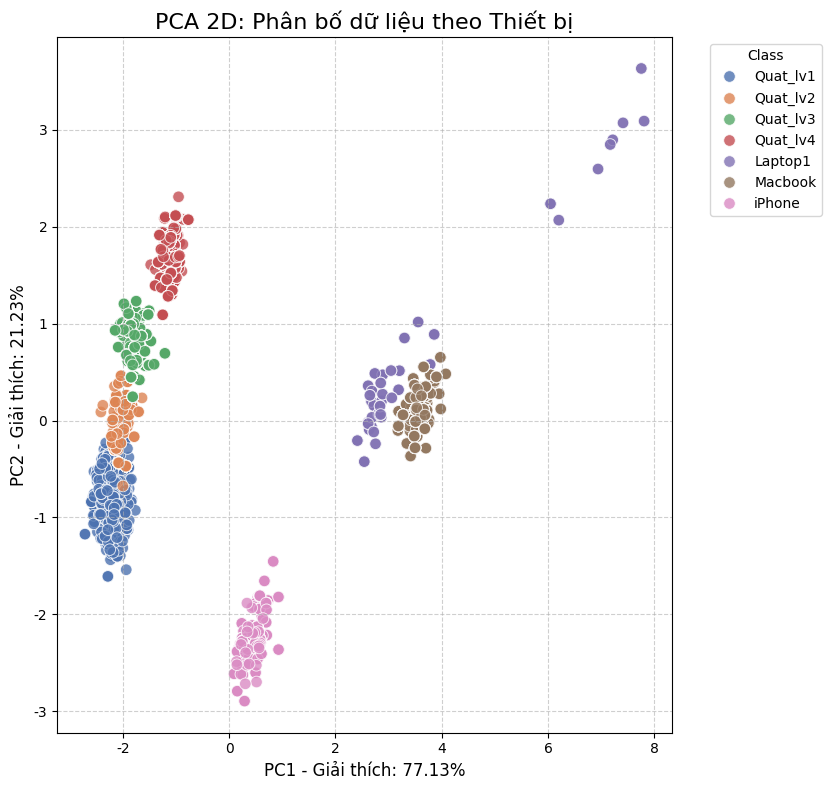

-> Đã tạo biểu đồ PCA 2D: pca_2d_separation_plot.png

--- 2.3. Vẽ Histogram (Công suất P) ---


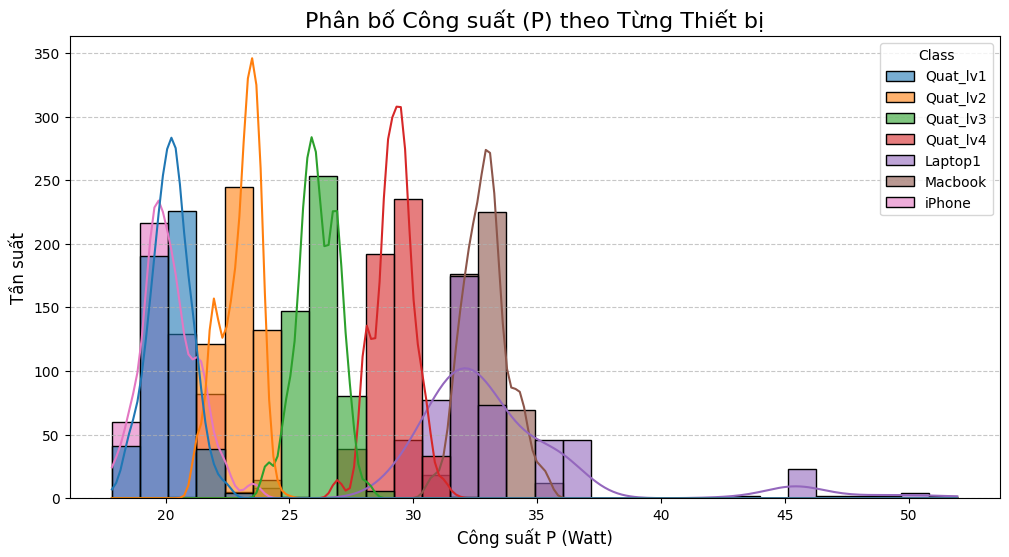

-> Đã tạo biểu đồ Histogram: power_histogram.png

Hoàn tất Phần 2: Khám phá Dữ liệu (EDA).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Ghép các file CSV ---
selected_devices = [0,1, 2,3,5,6,7]

df_list = []
for file in selected_devices:
    filename = f"thiet_bi_{file}.csv"
    df = pd.read_csv(filename)
    df_list.append(df)

final_df = pd.concat(df_list, ignore_index=True)
final_df.to_csv("cleaned_energy_data.csv", index=False)

# --- 2. Khám phá dữ liệu ---
feature_cols = ['P', 'cosphi', 'S', 'H1', 'H3', 'H5', 'H7']
label_col = 'Class'

# 2.1. Thống kê cơ bản
print("--- 2.1. Thống kê cơ bản ---")
stats_by_class = final_df.groupby(label_col)[feature_cols].agg(['mean', 'std'])
print("\nThống kê theo từng thiết bị (Kiểm tra phân bố):\n")
print(stats_by_class.to_markdown(numalign="left", stralign="left"))

# 2.2. Vẽ PCA 2D
print("\n--- 2.2. Vẽ PCA 2D ---")
X = final_df[feature_cols].values
X = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df[label_col] = final_df[label_col].values

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="PC1", y="PC2",
    hue=label_col,
    data=pca_df,
    palette="deep",
    s=70, alpha=0.8
)

explained_variance_1 = pca.explained_variance_ratio_[0] * 100
explained_variance_2 = pca.explained_variance_ratio_[1] * 100

plt.title('PCA 2D: Phân bố dữ liệu theo Thiết bị', fontsize=16)
plt.xlabel(f'PC1 - Giải thích: {explained_variance_1:.2f}%', fontsize=12)
plt.ylabel(f'PC2 - Giải thích: {explained_variance_2:.2f}%', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=label_col)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout(rect=[0, 0, 0.85, 1])

pca_plot_filename = 'pca_2d_separation_plot.png'
plt.savefig(pca_plot_filename)
plt.show()
print(f"-> Đã tạo biểu đồ PCA 2D: {pca_plot_filename}")

# 2.3. Vẽ Histogram
print("\n--- 2.3. Vẽ Histogram (Công suất P) ---")
plt.figure(figsize=(12, 6))
sns.histplot(data=final_df, x='P', hue=label_col, kde=True, bins=30, alpha=0.6)

plt.title('Phân bố Công suất (P) theo Từng Thiết bị', fontsize=16)
plt.xlabel('Công suất P (Watt)', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

hist_plot_filename = 'power_histogram.png'
plt.savefig(hist_plot_filename)
plt.show()
print(f"-> Đã tạo biểu đồ Histogram: {hist_plot_filename}")

print("\nHoàn tất Phần 2: Khám phá Dữ liệu (EDA).")


cái này chạy chính này t dùng để xem nó vẽ cái PCA 2D gì đấy để xem rõ hơn
với phần này thì tôi nhờ gemini pro để phân tích rõ xem tác dụng của các features mình dùng ô có thể điều chỉnh các feartures ở feature_cols = ['P', 'cosphi', 'H1',  'H7']


--- 2.1. Thống kê cơ bản ---

Thống kê theo từng thiết bị (Kiểm tra phân bố):

| Class    | ('P', 'mean')   | ('P', 'std')   | ('cosphi', 'mean')   | ('cosphi', 'std')   | ('H1', 'mean')   | ('H1', 'std')   | ('H7', 'mean')   | ('H7', 'std')   |
|:---------|:----------------|:---------------|:---------------------|:--------------------|:-----------------|:----------------|:-----------------|:----------------|
| Laptop1  | 33.6948         | 4.08956        | 0.525269             | 0.0152165           | 0.148248         | 0.017189        | 0.0654946        | 0.0082787       |
| Macbook  | 32.9281         | 0.909711       | 0.475004             | 0.0100434           | 0.147009         | 0.00456117      | 0.069009         | 0.00427105      |
| Quat_lv1 | 20.1745         | 0.826014       | 0.681018             | 0.0337832           | 0.0879216        | 0.00399973      | 0.00581917       | 0.00210052      |
| Quat_lv2 | 23.0039         | 0.760725       | 0.717903             | 0.0282797      

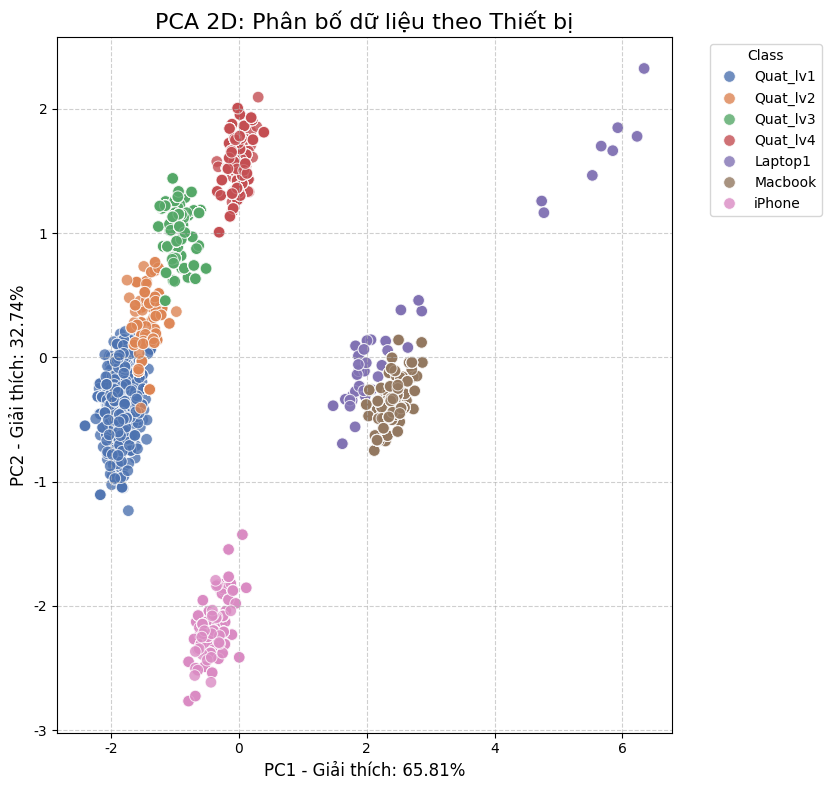

-> Đã tạo biểu đồ PCA 2D: pca_2d_separation_plot.png

--- 2.3. Vẽ Histogram (Công suất P) ---


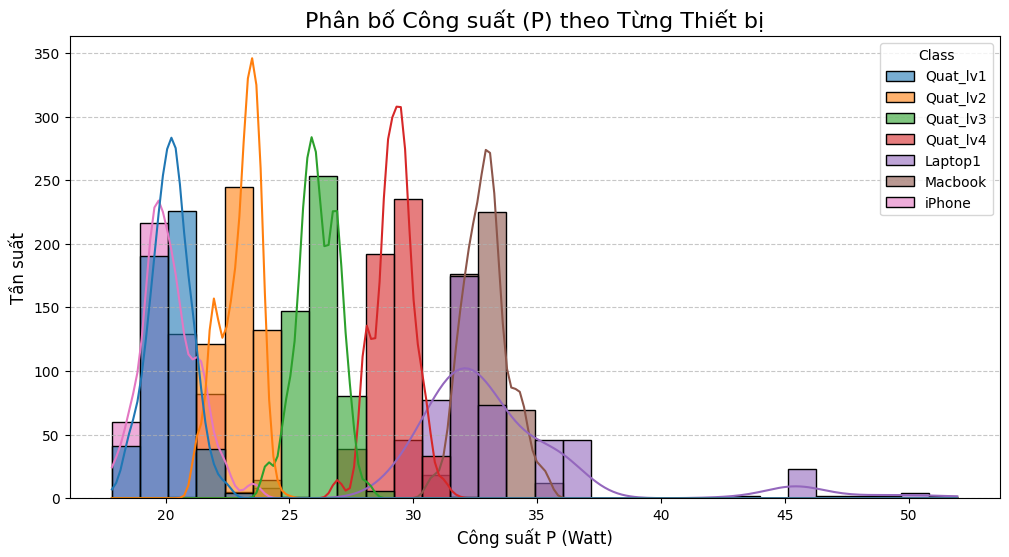

-> Đã tạo biểu đồ Histogram: power_histogram.png

Hoàn tất Phần 2: Khám phá Dữ liệu (EDA).

--- 2.4. Đóng góp của từng feature vào PCA ---
             PC1       PC2  Total_Impact
cosphi -0.368526  0.691812      1.060338
H1      0.513525  0.471279      0.984804
P       0.545630  0.400041      0.945671
H7      0.550244 -0.373175      0.923419

Top 4 feature được chọn cho mô hình: ['cosphi', 'H1', 'P', 'H7']

--- 2.6. Vẽ Boxplot cho các feature được chọn ---


/tmp/ipython-input-1616166656.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=final_df, x=label_col, y=feature, palette="Set2")
/tmp/ipython-input-1616166656.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=final_df, x=label_col, y=feature, palette="Set2")
/tmp/ipython-input-1616166656.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=final_df, x=label_col, y=feature, palette="Set2")
/tmp/ipython-input-1616166656.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed

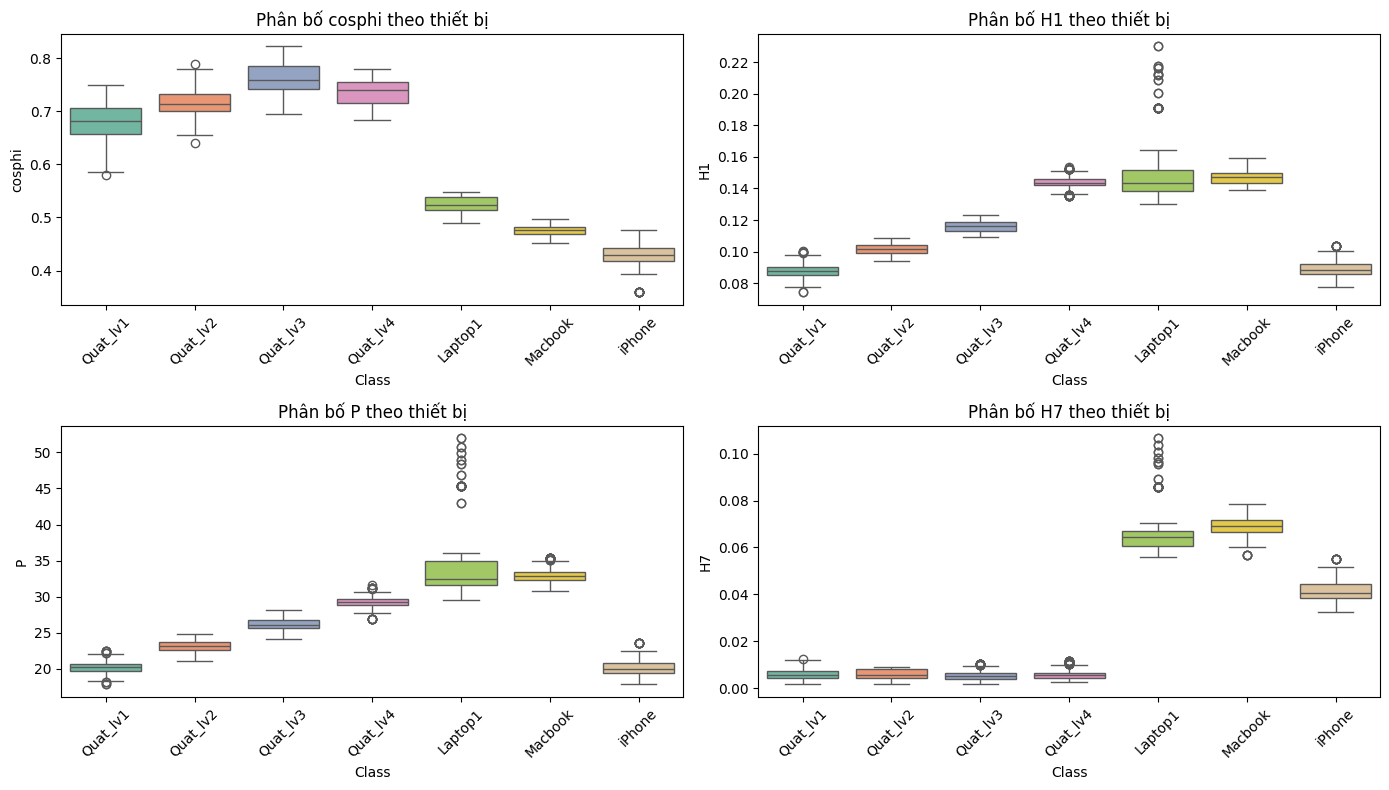

-> Đã tạo biểu đồ Boxplot: top_features_boxplot.png


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Ghép các file CSV ---
selected_devices = [0,1, 2,3,5,6,7]

df_list = []
for file in selected_devices:
    filename = f"thiet_bi_{file}.csv"
    df = pd.read_csv(filename)
    df_list.append(df)

final_df = pd.concat(df_list, ignore_index=True)
final_df.to_csv("cleaned_energy_data.csv", index=False)

# --- 2. Khám phá dữ liệu ---
feature_cols = ['P', 'cosphi', 'H1',  'H7']
label_col = 'Class'

# 2.1. Thống kê cơ bản
print("--- 2.1. Thống kê cơ bản ---")
stats_by_class = final_df.groupby(label_col)[feature_cols].agg(['mean', 'std'])
print("\nThống kê theo từng thiết bị (Kiểm tra phân bố):\n")
print(stats_by_class.to_markdown(numalign="left", stralign="left"))

# 2.2. Vẽ PCA 2D
print("\n--- 2.2. Vẽ PCA 2D ---")
X = final_df[feature_cols].values
X = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df[label_col] = final_df[label_col].values

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="PC1", y="PC2",
    hue=label_col,
    data=pca_df,
    palette="deep",
    s=70, alpha=0.8
)

explained_variance_1 = pca.explained_variance_ratio_[0] * 100
explained_variance_2 = pca.explained_variance_ratio_[1] * 100

plt.title('PCA 2D: Phân bố dữ liệu theo Thiết bị', fontsize=16)
plt.xlabel(f'PC1 - Giải thích: {explained_variance_1:.2f}%', fontsize=12)
plt.ylabel(f'PC2 - Giải thích: {explained_variance_2:.2f}%', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=label_col)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout(rect=[0, 0, 0.85, 1])

pca_plot_filename = 'pca_2d_separation_plot.png'
plt.savefig(pca_plot_filename)
plt.show()
print(f"-> Đã tạo biểu đồ PCA 2D: {pca_plot_filename}")

# 2.3. Vẽ Histogram
print("\n--- 2.3. Vẽ Histogram (Công suất P) ---")
plt.figure(figsize=(12, 6))
sns.histplot(data=final_df, x='P', hue=label_col, kde=True, bins=30, alpha=0.6)

plt.title('Phân bố Công suất (P) theo Từng Thiết bị', fontsize=16)
plt.xlabel('Công suất P (Watt)', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

hist_plot_filename = 'power_histogram.png'
plt.savefig(hist_plot_filename)
plt.show()
print(f"-> Đã tạo biểu đồ Histogram: {hist_plot_filename}")

print("\nHoàn tất Phần 2: Khám phá Dữ liệu (EDA).")

# 2.4. Phân tích đóng góp của từng feature vào PCA
print("\n--- 2.4. Đóng góp của từng feature vào PCA ---")
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=feature_cols)
loadings['PC1_abs'] = loadings['PC1'].abs()
loadings['PC2_abs'] = loadings['PC2'].abs()
loadings['Total_Impact'] = loadings['PC1_abs'] + loadings['PC2_abs']
loadings_sorted = loadings.sort_values(by='Total_Impact', ascending=False)
print(loadings_sorted[['PC1', 'PC2', 'Total_Impact']])

# 2.5. Chọn top-k feature có ảnh hưởng lớn nhất
top_k = 4
top_features = loadings_sorted.head(top_k).index.tolist()
print(f"\nTop {top_k} feature được chọn cho mô hình: {top_features}")

# 2.6. Vẽ biểu đồ Boxplot để kiểm tra phân bố theo thiết bị
print("\n--- 2.6. Vẽ Boxplot cho các feature được chọn ---")
plt.figure(figsize=(14, 8))
for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=final_df, x=label_col, y=feature, palette="Set2")
    plt.title(f'Phân bố {feature} theo thiết bị')
    plt.xticks(rotation=45)
    plt.tight_layout()

boxplot_filename = 'top_features_boxplot.png'
plt.savefig(boxplot_filename)
plt.show()
print(f"-> Đã tạo biểu đồ Boxplot: {boxplot_filename}")


Phần này là chuẩn hóa dữ luêuj này chuẩn hóa dữ liệu ở các feature mình chọn ô đọc qua cũng đc tiện thế ô tim hiểu xem cách chuẩn hóa dữ liệu luôn nhé


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import sys
import os

# Tên file ĐẦU VÀO đã làm sạch từ Phần 1
csv_filename = 'cleaned_energy_data.csv'
data = None

try:
    # Đọc file CSV đã làm sạch
    data = pd.read_csv(csv_filename)
    print(f"Đã đọc file ĐẦU VÀO: {csv_filename}")
except FileNotFoundError:
    print(f"Lỗi: Không tìm thấy file '{csv_filename}'. Hãy đảm bảo bạn đã hoàn thành Phần 1.")
    sys.exit()

# Định nghĩa các cột cần thiết
base_features = ['P', 'cosphi', 'H1', 'H7']
label_col = 'Class'

print("\n--- PHẦN 3 — TIỀN XỬ LÝ (FEATURE ENGINEERING) ---")

# --- 3.0. Chuẩn bị: Ánh xạ nhãn (BẮT BUỘC) ---
# Dù không được yêu cầu trong tiêu đề phần, nhưng cần cho huấn luyện mô hình sau này.
print("-> 3.0. Ánh xạ nhãn (Label Encoding)")
le = LabelEncoder()
data['Class_Encoded'] = le.fit_transform(data[label_col])
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(f"Ánh xạ nhãn: {label_mapping}")


# --- 3.2. Tạo thêm đặc trưng nâng cao ---
print("\n-> 3.2. Tạo thêm đặc trưng nâng cao")

# 3. Mean của các đặc trưng cơ bản


# 4. Std của các đặc trưng cơ bản


# Cập nhật danh sách tất cả các đặc trưng
all_features = base_features

# Xử lý các giá trị vô hạn sinh ra sau khi tạo đặc trưng (do chia cho 0 nếu Irms = 0)
data = data.replace([np.inf, -np.inf], np.nan)


# --- 3.3. Chuẩn hóa feature (StandardScaler) ---
print("\n-> 3.3. Chuẩn hóa Feature (StandardScaler)")

# Chỉ scale các cột đặc trưng (đã loại bỏ NaN/Inf)
# Chỉ lấy các dòng không có NaN để scale
data_to_scale = data.dropna(subset=all_features)
X_data = data_to_scale[all_features].values

# Khởi tạo và áp dụng StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X_data)

# Tạo DataFrame cho các đặc trưng đã scale
scaled_columns = [f'{col}_Scaled' for col in all_features]
data_scaled_df = pd.DataFrame(data_scaled, columns=scaled_columns, index=data_to_scale.index)

# Ghép các cột đã scale trở lại DataFrame gốc
data_final = pd.concat([data_to_scale.drop(columns=all_features), data_scaled_df], axis=1)


# --- LƯU KẾT QUẢ (Tạo file MỚI) ---
output_filename = 'feature_engineered_data.csv'
data_final.to_csv(output_filename, index=False)

print(f"\n✅ HOÀN TẤT: Đã tạo file ĐẦU RA mới tại: {output_filename}")
print("\nThông tin 5 dòng đầu của dữ liệu đã được tiền xử lý:")
print(data_final.head())
print("\nThông tin kiểu dữ liệu (dtypes) của file cuối cùng:")
print(data_final.info())

Đã đọc file ĐẦU VÀO: cleaned_energy_data.csv

--- PHẦN 3 — TIỀN XỬ LÝ (FEATURE ENGINEERING) ---
-> 3.0. Ánh xạ nhãn (Label Encoding)
Ánh xạ nhãn: {'Den_led': np.int64(0), 'Laptop1': np.int64(1), 'Macbook': np.int64(2), 'Quat_lv1': np.int64(3), 'Quat_lv2': np.int64(4), 'Quat_lv3': np.int64(5), 'Quat_lv4': np.int64(6), 'Unknown': np.int64(7), 'iPhone': np.int64(8)}

-> 3.2. Tạo thêm đặc trưng nâng cao

-> 3.3. Chuẩn hóa Feature (StandardScaler)

✅ HOÀN TẤT: Đã tạo file ĐẦU RA mới tại: feature_engineered_data.csv

Thông tin 5 dòng đầu của dữ liệu đã được tiền xử lý:
                  Time      Vrms      Irms         S        H3        H5  \
0  20/12/2025 23:52:32  230.2151  0.125679  28.93317  0.006469  0.023567   
1  20/12/2025 23:52:32  230.7836  0.122590  28.29169  0.004339  0.018832   
2  20/12/2025 23:52:32  229.4965  0.131259  30.12359  0.006396  0.019549   
3  20/12/2025 23:52:32  229.8086  0.123186  28.30922  0.007402  0.021684   
4  20/12/2025 23:52:32  230.2036  0.127261  29.295

Phần này là huấn luyện mô hình để train mô hình đang bị sai chắc chấn bị sai vì ko thể nào chính xác như thế nhưng ko bt tại sao nó cao như thế ô có thể hỏi lại gemini

--- PHẦN 4 — HUẤN LUYỆN MÔ HÌNH MLP ---

-> 4.1. Chia dữ liệu (Train/Test Split)
Kích thước tập Train: 3600 mẫu
Kích thước tập Test: 900 mẫu

-> 4.2. Huấn luyện mô hình MLP (1 lớp ẩn 64 Neurons) cho TinyML

=== KẾT QUẢ ĐÁNH GIÁ: MLPClassifier (64 Neurons) ===

[1] Báo cáo Phân loại (Classification Report):

              precision    recall  f1-score   support

     Den_led       1.00      1.00      1.00       100
     Laptop1       0.98      0.98      0.98       100
     Macbook       0.98      0.98      0.98       100
    Quat_lv1       0.92      0.95      0.94       100
    Quat_lv2       0.91      0.91      0.91       100
    Quat_lv3       0.99      0.96      0.97       100
    Quat_lv4       1.00      1.00      1.00       100
     Unknown       1.00      1.00      1.00       100
      iPhone       1.00      1.00      1.00       100

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.

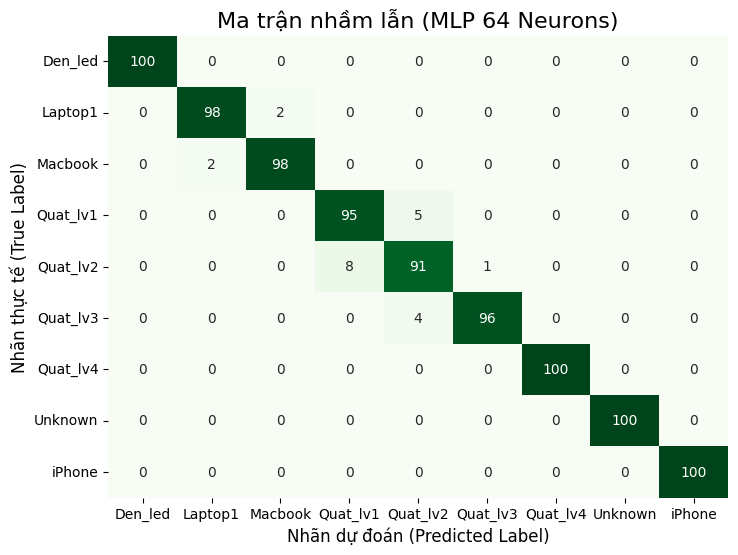


-> Đã tạo biểu đồ Ma trận nhầm lẫn: confusion_matrix_mlp_final.png


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import numpy as np

# Thiết lập cho hiển thị tiếng Việt và tránh lỗi font trong matplotlib
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# Tên file ĐẦU VÀO đã được tiền xử lý (từ Phần 3)
csv_filename = 'feature_engineered_data.csv'

try:
    data = pd.read_csv(csv_filename)
except FileNotFoundError:
    print(f"Lỗi: Không tìm thấy file '{csv_filename}'. Hãy đảm bảo bạn đã hoàn thành Phần 3 và file này nằm cùng thư mục.")
    sys.exit()

# 1. Định nghĩa Features (X) và Target (y)
# Lấy tất cả các cột đã được Scale (chuẩn hóa) làm đầu vào
feature_cols = [col for col in data.columns if col.endswith('_Scaled')]
X = data[feature_cols]
y = data['Class_Encoded']

# Lấy tên nhãn gốc để in báo cáo
label_map = data[['Class', 'Class_Encoded']].drop_duplicates().sort_values('Class_Encoded')
labels = label_map['Class'].tolist()

print("--- PHẦN 4 — HUẤN LUYỆN MÔ HÌNH MLP ---")

# --- 4.1. Chia train/test (80/20, Stratify) ---
print("\n-> 4.1. Chia dữ liệu (Train/Test Split)")
# stratify=y đảm bảo tỷ lệ các lớp được giữ nguyên trong tập test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print(f"Kích thước tập Train: {len(X_train)} mẫu")
print(f"Kích thước tập Test: {len(X_test)} mẫu")


# --- 4.2. Huấn luyện mô hình MLPClassifier ---
print("\n-> 4.2. Huấn luyện mô hình MLP (1 lớp ẩn 64 Neurons) cho TinyML")
mlp_model = MLPClassifier(
    hidden_layer_sizes=(64,), # 1 lớp ẩn 64 neurons
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42,
    early_stopping=True      # Tự động dừng sớm
)

mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)


# --- 4.3. Đánh giá: MLPClassifier ---
print("\n=======================================================")
print("=== KẾT QUẢ ĐÁNH GIÁ: MLPClassifier (64 Neurons) ===")
print("=======================================================")

# 1. In classification_report
print("\n[1] Báo cáo Phân loại (Classification Report):\n")
print(classification_report(y_test, y_pred_mlp, target_names=labels))

# 2. In và Vẽ Confusion Matrix (Heatmap)
print("\n[2] Ma trận nhầm lẫn (Confusion Matrix):\n")
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
print(cm_mlp)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_mlp,
    annot=True,
    fmt='d',
    cmap='Greens',
    xticklabels=labels,
    yticklabels=labels,
    cbar=False
)

plt.title('Ma trận nhầm lẫn (MLP 64 Neurons)', fontsize=16)
plt.ylabel('Nhãn thực tế (True Label)', fontsize=12)
plt.xlabel('Nhãn dự đoán (Predicted Label)', fontsize=12)

cm_mlp_filename = 'confusion_matrix_mlp_final.png'
plt.savefig(cm_mlp_filename)
plt.show() # Hiển thị biểu đồ
print(f"\n-> Đã tạo biểu đồ Ma trận nhầm lẫn: {cm_mlp_filename}")

đây là phần để có thể chuyển mô hình thành .tflite

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import sys

# --- I. TÁI TẠO MÔI TRƯỜNG DỮ LIỆU VÀ HUẤN LUYỆN (Phần 1 - 4) ---

# Tên file đầu vào (Bạn cần đảm bảo file này có sẵn)
csv_filename = 'feature_engineered_data.csv'
try:
    data = pd.read_csv(csv_filename)
except FileNotFoundError:
    print("LỖI: Không tìm thấy file 'feature_engineered_data.csv'.")
    print("Hãy đảm bảo bạn đã hoàn thành PHẦN 3 và file này nằm cùng thư mục.")
    sys.exit()

# 1. Định nghĩa Features (X) và Target (y)
feature_cols = [col for col in data.columns if col.endswith('_Scaled')]
X_scaled = data[feature_cols].values
y_encoded = data['Class_Encoded'].values

# Lấy số lượng classes (để xác định output layer size)
num_classes = len(np.unique(y_encoded))

# 2. Chia dữ liệu (Cần thiết cho việc huấn luyện lại)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 3. Xây dựng mô hình MLP (Tái tạo lại cấu trúc Phần 4)
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 4. Huấn luyện lại mô hình
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
print("\nĐang HUẤN LUYỆN LẠI mô hình Keras để đảm bảo trọng số mới nhất...")
model.fit(
    X_train, y_train,
    epochs=666, # Số epoch tối đa
    batch_size=100,
    validation_split=0.2, # Validation Split từ tập Train
    callbacks=[early_stopping],
    verbose=0 # Tắt log huấn luyện
)
print("-> Hoàn tất huấn luyện.")


# --- II. CHUYỂN ĐỔI SANG TFLITE ---

print("\n--- PHẦN 5: CHUYỂN ĐỔI SANG TFLITE ---")

# 5.1. Convert .h5 → .tflite (Sử dụng tối ưu hóa mặc định)
# Lựa chọn này là tốt nhất vì nó giảm kích thước mà không cần cung cấp dữ liệu mẫu
print("-> Bắt đầu Convert và Tối ưu hóa...")
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Tối ưu hóa mặc định (Giảm kích thước trọng số Float32)
# Đây là bước tối ưu hóa nhẹ nhàng, tương đương với Optimize.DEFAULT


tflite_model = converter.convert()

# 5.2. Lưu file TFLite
tflite_filename = 'mlp_model_optimized.tflite'
with open(tflite_filename, "wb") as f:
    f.write(tflite_model)

print(f"\n✅ THÀNH CÔNG! File TFLite đã được tạo: {tflite_filename}")
print("   File này sử dụng tối ưu hóa mặc định (Default Optimization) và sẵn sàng cho TinyML.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Đang HUẤN LUYỆN LẠI mô hình Keras để đảm bảo trọng số mới nhất...
-> Hoàn tất huấn luyện.

--- PHẦN 5: CHUYỂN ĐỔI SANG TFLITE ---
-> Bắt đầu Convert và Tối ưu hóa...
Saved artifact at '/tmp/tmpa36zlsx_'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 4), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 9), dtype=tf.float32, name=None)
Captures:
  138188720751440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138190825784720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138188720754128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138188720752400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138188720752208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138188720754320: TensorSpec(shape=(), dtype=tf.resource, name=None)

✅ THÀNH CÔNG! File TFLite đã được tạo: mlp_model_optimized.tflite
   File này sử dụng tối ưu hóa mặc định (Default Optimization) và sẵn sà

In [ ]:
phần này chuyển về mô hình model.h

In [ ]:

# --- PHẦN 6: TẠO FILE C HEADER (.h) CHO ARDUINO (BẮT BUỘC CHO ESP32) ---
# ==============================================================================

def hex_to_c_array(data, model_name="mlp_model_data"):
    c_str = ""
    c_str += f"// Auto-generated TensorFlow Lite Model\n"
    c_str += f"// Architecture: MLP (64, 32) -> Softmax\n"
    c_str += f"// Source: Native Keras Training\n\n"

    # QUAN TRỌNG: Thêm biến độ dài mảng để code Arduino không bị lỗi
    c_str += f"const unsigned int {model_name}_len = {len(data)};\n"
    c_str += f"const unsigned char {model_name}[] = {{\n"

    hex_array = []
    for i, val in enumerate(data):
        hex_array.append(f"0x{val:02x}")
        if (i + 1) % 12 == 0: # Xuống dòng mỗi 12 byte cho đẹp
            c_str += "  " + ", ".join(hex_array) + ",\n"
            hex_array = []

    if hex_array:
        c_str += "  " + ", ".join(hex_array) + "\n"

    c_str += "};\n"
    return c_str

# Tạo nội dung file .h từ biến tflite_model có sẵn ở bước trên
h_filename = "model_data.h"
# Lưu ý: Tên biến trong C là 'mlp_model_optimized_tflite' để khớp với code Arduino bạn đang dùng
c_code = hex_to_c_array(tflite_model, "mlp_model_optimized_tflite")

# Lưu file .h
with open(h_filename, "w") as f:
    f.write(c_code)

print(f"\n-> Đã tạo file Header cho Arduino: {h_filename}")
print(f"-> Kích thước mô hình: {len(tflite_model)} bytes")
print("\n[HƯỚNG DẪN]: Copy file 'model_data.h' này đè vào thư mục code ESP32 của bạn và nạp lại.")


-> Đã tạo file Header cho Arduino: model_data.h
-> Kích thước mô hình: 12892 bytes

[HƯỚNG DẪN]: Copy file 'model_data.h' này đè vào thư mục code ESP32 của bạn và nạp lại.


phần này để lấy scaler để chèn vào dòng trong esp32

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import sys

# Tên file GỐC ĐÃ LÀM SẠCH (ĐẦU VÀO CỦA PHẦN 3)
csv_filename = 'cleaned_energy_data.csv'
data_original = None

try:
    data_original = pd.read_csv(csv_filename)
except FileNotFoundError:
    print(f"LỖI: Không tìm thấy file '{csv_filename}'. Hãy đảm bảo file này tồn tại trong thư mục.")
    sys.exit()

# 1. TÁI TẠO LABEL ENCODING (Cần cho việc chia tập Stratify)
le = LabelEncoder()
data_original['Class_Encoded'] = le.fit_transform(data_original['Class'])
label_col = 'Class_Encoded'

# 2. Định nghĩa các features cơ bản (5 features)
BASE_FEATURES = ['P', 'cosphi','H1', 'H7']

# 3. Tái tạo Feature Engineering trên dữ liệu GỐC


# Xử lý lại NaN/Inf (có thể xuất hiện do chia cho 0)
data_original = data_original.replace([np.inf, -np.inf], np.nan).dropna()


# 4. Định nghĩa TẤT CẢ 9 features
ALL_FEATURES_ORIGINAL = BASE_FEATURES

# Lấy X và y
X_original = data_original[ALL_FEATURES_ORIGINAL]
y_encoded = data_original[label_col]

# 5. Tái tạo chia tập Train/Test (FIT Scaler phải được thực hiện trên TẬP TRAIN GỐC)
X_train_original, _, y_train_original, _ = train_test_split(
    X_original, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

# 6. FIT StandardScaler trên TẬP TRAIN GỐC
scaler = StandardScaler()
scaler.fit(X_train_original)

# --- 7. IN KẾT QUẢ RA DẠNG C++ ---
print("\n====================================================")
print("             THÔNG SỐ SCALER DẠNG C++               ")
print("====================================================")

# In mảng MEAN (μ)
print("\n// MẢNG MEAN (μ) - CẦN COPY/PASTE VÀO CODE C++")
print("// Thứ tự: Vrms, Irms, P, cosphi, bieukien, Power_Ratio, I_V_Ratio, Feature_Mean, Feature_Std")

mean_array = ", ".join(f"{m:.6f}f" for m in scaler.mean_) # Thêm 'f' để định dạng float C++
print(f"const float SCALER_MEAN[kModelInputSize] = {{\n    {mean_array}\n}};")

# In mảng STDDEV (σ)
print("\n// MẢNG STDDEV (σ) - CẦN COPY/PASTE VÀO CODE C++")
std_array = ", ".join(f"{s:.6f}f" for s in scaler.scale_) # Thêm 'f' để định dạng float C++
print(f"const float SCALER_STDDEV[kModelInputSize] = {{\n    {std_array}\n}};")

print("\n====================================================")


             THÔNG SỐ SCALER DẠNG C++               

// MẢNG MEAN (μ) - CẦN COPY/PASTE VÀO CODE C++
// Thứ tự: Vrms, Irms, P, cosphi, bieukien, Power_Ratio, I_V_Ratio, Feature_Mean, Feature_Std
const float SCALER_MEAN[kModelInputSize] = {
    21.345099f, 0.515257f, 0.096624f, 0.023443f
};

// MẢNG STDDEV (σ) - CẦN COPY/PASTE VÀO CODE C++
const float SCALER_STDDEV[kModelInputSize] = {
    10.892426f, 0.232382f, 0.048665f, 0.026228f
};

